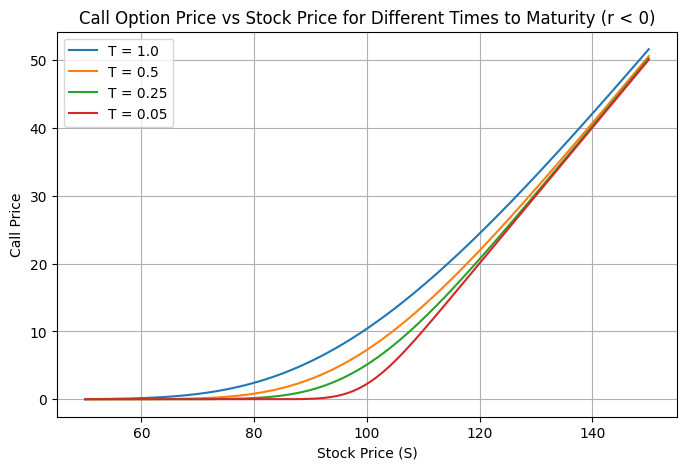

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call price
def call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
r = 0.01       # fixed negative interest rate
sigma = 0.25    # volatility

# Range of underlying prices
S_values = np.linspace(50, 150, 200)

# Different times to maturity
T_list = [1.0, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    call_vals = [call_price(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, call_vals, label=f'T = {T}')

plt.title('Call Option Price vs Stock Price for Different Times to Maturity (r > - sigma^2/2)')
plt.xlabel('Stock Price (S)')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''   
Behaves in the same way as sigma for 0 interest rate, we need time for sigma to kick in. For interest rate r>0, it's basically the same, however increasing T is worth a bit
because of the Ke^{-rT} discounting factor.
Increasing T actually changes the asymptope which our call option price tends to. Also gives slightly higher delta by considering N(d1). 
When S is really small so ln(S/K) is negative, having a larger T and sigma gives more delta
'''

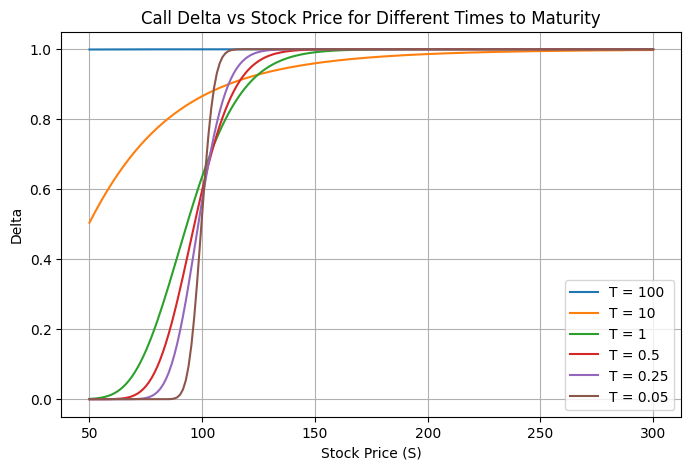

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100
r = 0.05
sigma = 0.2

# Range of underlying prices
S_values = np.linspace(50, 300, 200)

# Different times to maturity
T_list = [100,10,1, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    delta_vals = [call_delta(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, delta_vals, label=f'T = {T}')

plt.title('Call Delta vs Stock Price for Different Times to Maturity')
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()


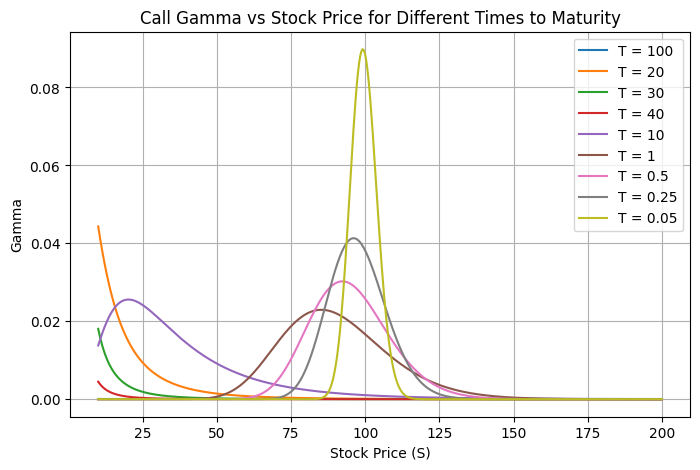

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes gamma
def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
K = 100
r = 0.1
sigma = 0.2

# Range of underlying prices
S_values = np.linspace(10, 200, 500)

# Different times to maturity
T_list = [100,20,30,40,10,1, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    gamma_vals = [call_gamma(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, gamma_vals, label=f'T = {T}')

plt.title('Call Gamma vs Stock Price for Different Times to Maturity')
plt.xlabel('Stock Price (S)')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
The higher the T, likewise for sigma, the heavier the tail asymptope, since ln(S/K)/ (sigma root(T)) is smaller in magnitude
'''